# House Price Prediction

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-price-prediction/Housing.csv


##  sklearn imports

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

## 1. Data importing 

In [3]:
data = pd.read_csv('/kaggle/input/housing-price-prediction/Housing.csv')

In [4]:
# checking first 5 records in dataset
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 2. Column description
- There are 13 columns in our dataset.
1. `Price`: The price of the house.
2. `Area`: The total area of the house in square feet.
3. `Bedrooms`: The number of bedrooms in the house.
4. `Bathrooms`: The number of bathrooms in the house.
5. `Stories`: The number of stories in the house.
6. `Mainroad`: Whether the house is connected to the main road (Yes/No).
7. `Guestroom`: Whether the house has a guest room (Yes/No).
8. `Basement`: Whether the house has a basement (Yes/No).
9. `Hot water heating`: Whether the house has a hot water heating system (Yes/No).
10. `Airconditioning`: Whether the house has an air conditioning system (Yes/No).
11. `Parking`: The number of parking spaces available within the house.
12. `Prefarea`: Whether the house is located in a preferred area (Yes/No).
13. `Furnishing status`: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).

## 3. Basic Programatical Analysis 

In [5]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
# shape of dataset
print('Shape of original dataset: ', data.shape)
print('Number of rows in dataset: ', data.shape[0])
print('Number of columns in dataset: ',data.shape[1])

Shape of original dataset:  (545, 13)
Number of rows in dataset:  545
Number of columns in dataset:  13


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


##  conclusion 1: Basic info about dataset and  its column count
- Here in dataset, total 13 columns are given.
- 6 columns are having numerical data ('int64')
- 7 columns are having categorical data
- Total number of rows in data is 545

In [8]:
# check missing values in dataset
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
# check duplicated rows in data
data.duplicated().sum()

0

## Conclusion 2: about missing and duplicated data
- Here in dataset, no any missing value and duplicated data.

#  Quick Summary about data

In [10]:
# Numerical columns summmary 
round(data.describe(), 2)

,price,area,bedrooms,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,4766729.25,5150.54,2.97,1.29,1.81,0.69
std,1870439.62,2170.14,0.74,0.50,0.87,0.86
min,1750000.00,1650.00,1.00,1.00,1.00,0.00
25%,3430000.00,3600.00,2.00,1.00,1.00,0.00
50%,4340000.00,4600.00,3.00,1.00,2.00,0.00
75%,5740000.00,6360.00,3.00,2.00,2.00,1.00
max,13300000.00,16200.00,6.00,4.00,4.00,3.00


In [11]:
# Categorical columns summary
data.describe(include='O')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


# 4. Exploratory Data Analysis

## EDA-1. Column Type

In [12]:
num_cols = data.describe().columns
cat_cols = data.describe(include='O').columns

print('Numerical columns are: ', num_cols)
print()
print('Categorical columns are: ', cat_cols)

Numerical columns are:  Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

Categorical columns are:  Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


1. `Numerical Column`: price, area, bedrooms, bathrooms, stories, parking
2. `Categorical Columns`: mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus
3. our target column is `price`

## EDA-2. Univariate Analysis

### 1. Numerical columns univariate analysis 

In [13]:
num_cols

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [14]:
# Descriptive statistics
round(data[num_cols].describe(), 2)

,price,area,bedrooms,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,4766729.25,5150.54,2.97,1.29,1.81,0.69
std,1870439.62,2170.14,0.74,0.50,0.87,0.86
min,1750000.00,1650.00,1.00,1.00,1.00,0.00
25%,3430000.00,3600.00,2.00,1.00,1.00,0.00
50%,4340000.00,4600.00,3.00,1.00,2.00,0.00
75%,5740000.00,6360.00,3.00,2.00,2.00,1.00
max,13300000.00,16200.00,6.00,4.00,4.00,3.00


In [15]:
# create a fuction for univariate analysis of numerical columns
def univariate_num(col):
    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    # histogram
    sns.histplot(x=data[col], bins=30, stat='frequency', ax = ax[0], kde=True )
    ax[0].set_title(f'Histogram for {col} distribution.')
    
    # boxplot
    sns.boxplot(x=data[col], ax= ax[1])
    ax[1].set_title(f'Boxplot for {col} column.')
    plt.show()
    # skewness
    skewness = data[col].skew()
    if skewness < 0:
        print(f'skewness for {col} column data is {skewness} --> negative skewed')
    elif skewness > 0:
        print(f'skewness for {col} column data is {skewness} --> positively skewed ')
    else:
        print(f'skewness for {col} column data is {skewness} --> normaly distributed.')
        
   
    


1. Univariate analysis for price column:


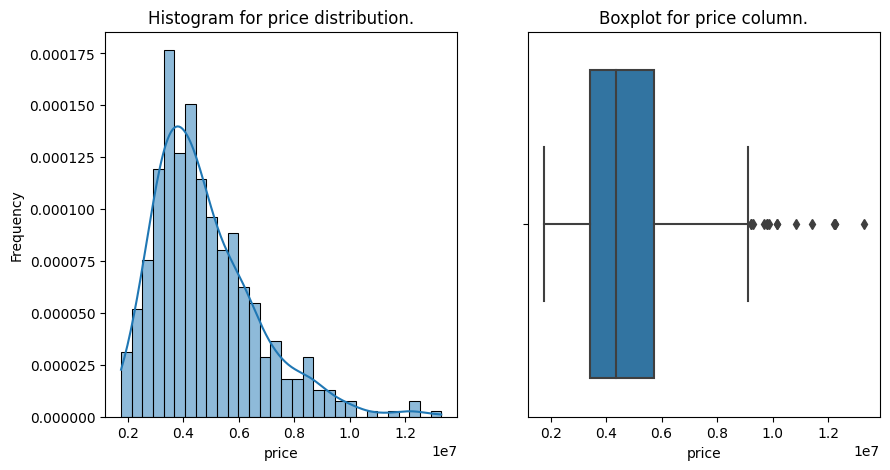

skewness for price column data is 1.2122388370279802 --> positively skewed 
2. Univariate analysis for area column:


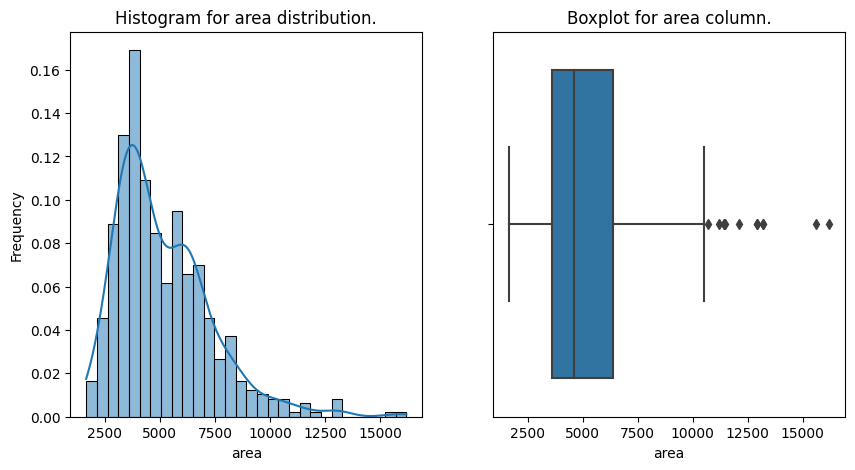

skewness for area column data is 1.321188343153483 --> positively skewed 
3. Univariate analysis for bedrooms column:


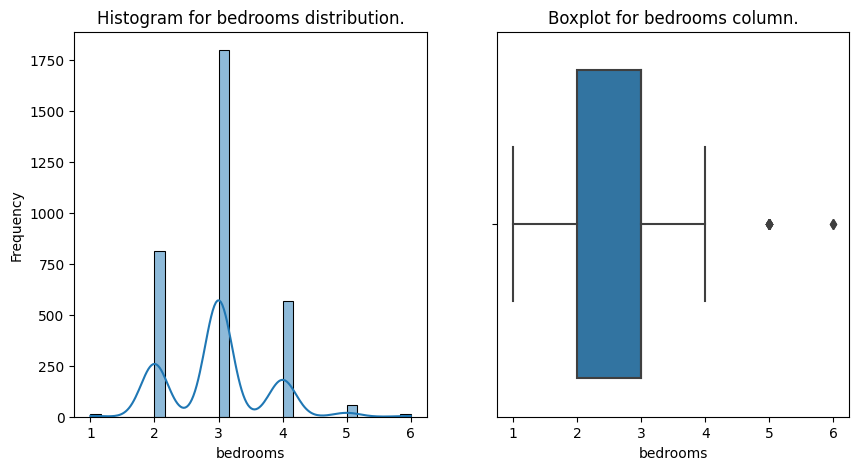

skewness for bedrooms column data is 0.49568394074553473 --> positively skewed 
4. Univariate analysis for bathrooms column:


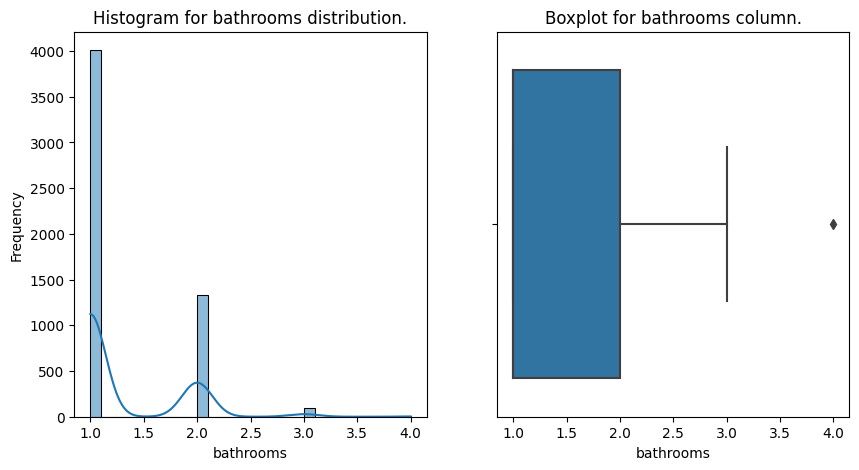

skewness for bathrooms column data is 1.5892635781317528 --> positively skewed 
5. Univariate analysis for stories column:


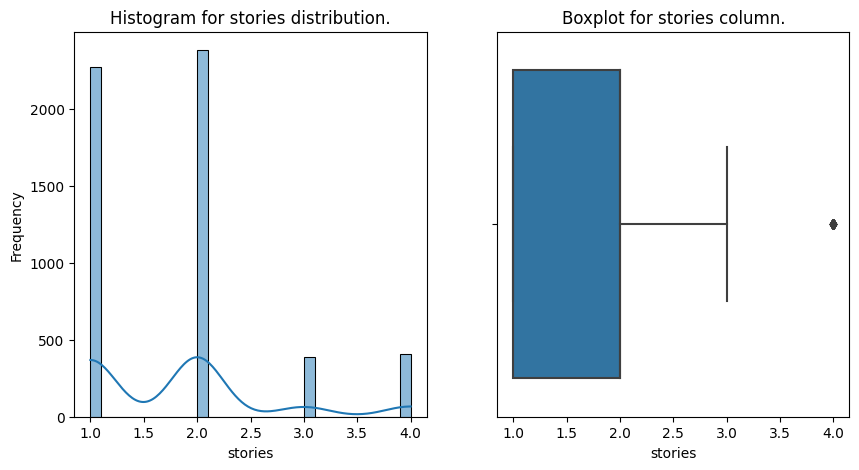

skewness for stories column data is 1.0820882904085742 --> positively skewed 
6. Univariate analysis for parking column:


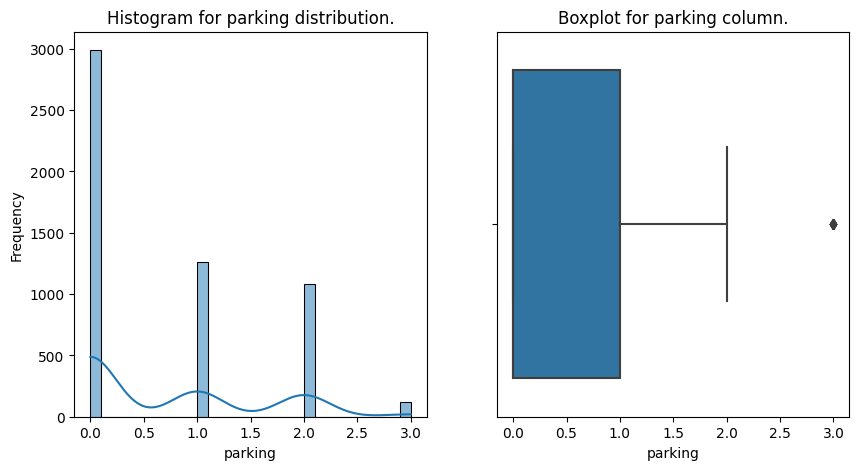

skewness for parking column data is 0.8420623343734072 --> positively skewed 


In [16]:
a = 1
for col in num_cols:
    print(f'{a}. Univariate analysis for {col} column:')
    univariate_num(col)
    print('=='*40)
    a+=1

## Conclusion 3: about Univariate analysis on numerical columns
- There are two columns having outliers : price and area
- other columns are also showing outliers, but they won't affected on our analysis
- Column `area` having positive skewd data, we will apply logarithm transform on them to  make them normal skewed


### 2. Univariate analysis on categorical  columns

In [17]:
# create a fuction for univariate analysis on categorical data
def univariate_cat(col):
    count = data[col].value_counts()
    print(count)
    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    # countplot
    sns.countplot(x=data[col], ax = ax[0] )
    ax[0].set_title(f'Countplot for {col} distribution.')
    
    # pie chart
    ax[1].pie(count, labels=count.index, autopct='%1.1f%%', shadow=True )
    ax[1].set_title(f'Piechart for {col} column.')
    plt.show()

1. Univariate analysis for categorical 'mainroad' column:
mainroad
yes    468
no      77
Name: count, dtype: int64


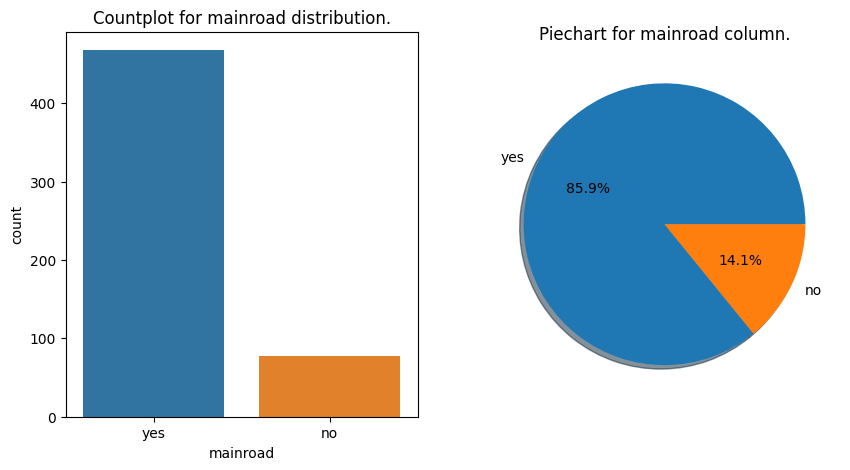

2. Univariate analysis for categorical 'guestroom' column:
guestroom
no     448
yes     97
Name: count, dtype: int64


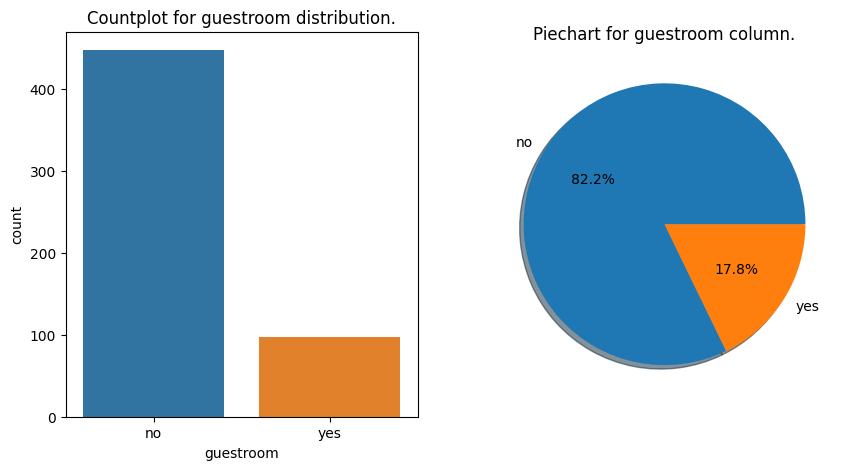

3. Univariate analysis for categorical 'basement' column:
basement
no     354
yes    191
Name: count, dtype: int64


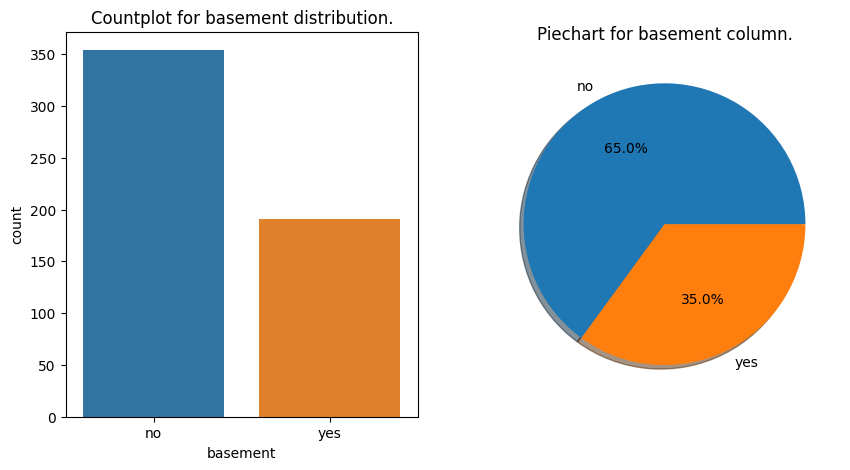

4. Univariate analysis for categorical 'hotwaterheating' column:
hotwaterheating
no     520
yes     25
Name: count, dtype: int64


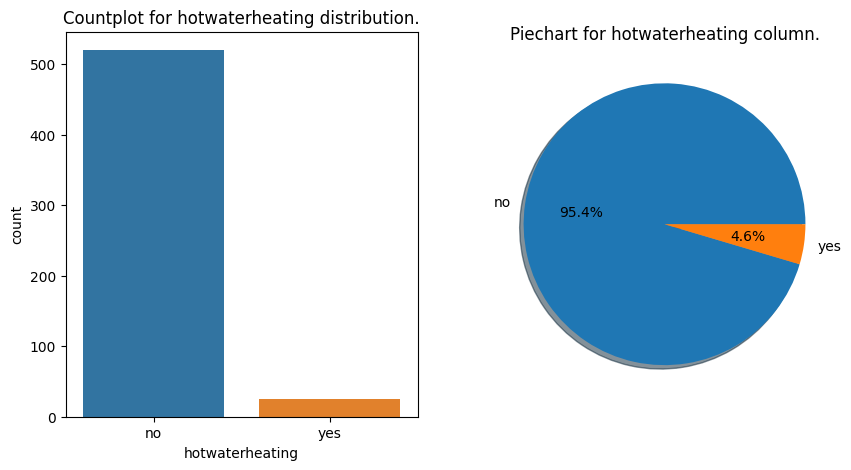

5. Univariate analysis for categorical 'airconditioning' column:
airconditioning
no     373
yes    172
Name: count, dtype: int64


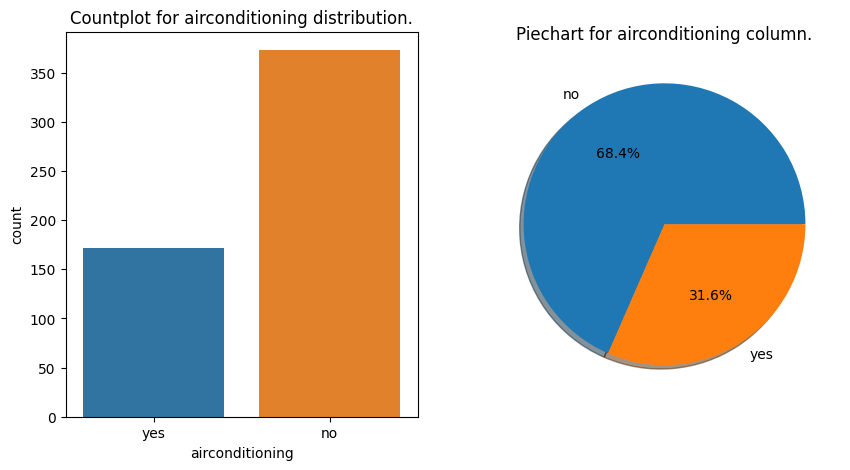

6. Univariate analysis for categorical 'prefarea' column:
prefarea
no     417
yes    128
Name: count, dtype: int64


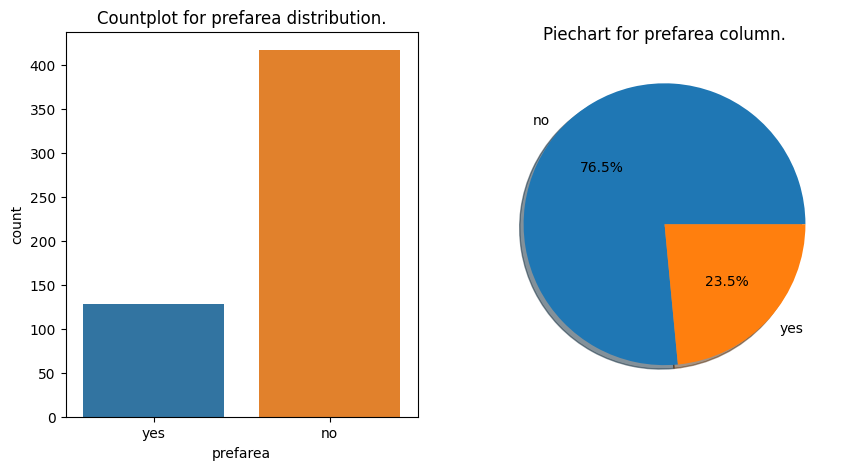

7. Univariate analysis for categorical 'furnishingstatus' column:
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


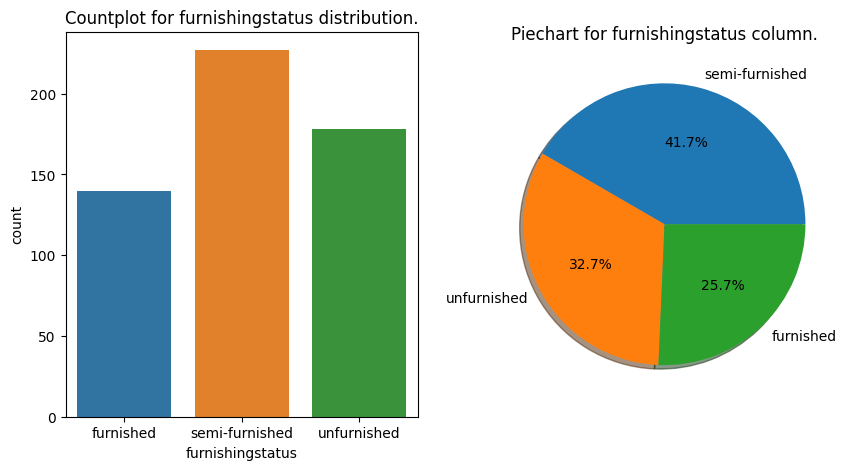

In [18]:
a = 1
for col in cat_cols:
    print(f"{a}. Univariate analysis for categorical '{col}' column:")
    univariate_cat(col)
    print('=='*40)
    a+=1

## EDA-3. Bivariate Analysis
- We are doing bivariate analysis between our target column 'price' and  other each column of dataset.

### 1. Bivariate Analysis between each Numerical column with 'price' column


In [19]:
# create fuction for bivariate analysis for numerical columns
def bivariate_num(col):
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))

    # Scatter Plot
    sns.scatterplot(x=data[col], y=data['price'], ax=ax[0, 0])
    ax[0,0].set_title(f'Relation between z and price of diamonds')

    # Regression Plot
    sns.regplot(x=data[col], y=data['price'], ax=ax[0,1])
    ax[0,1].set_title(f'Regression Plot: {col} vs Price')

    # Heatmap
    heatmap_data = data[[col, 'price']].corr()
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', ax=ax[1, 0])
    ax[1, 0].set_title(f'Correlation Heatmap: {col} vs Price')

    ax[1,1].axis('off')


    plt.tight_layout()
    plt.show()
    
    

In [20]:
num_cols

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

1. Bivariate analysis between 'price' and 'area' columns.


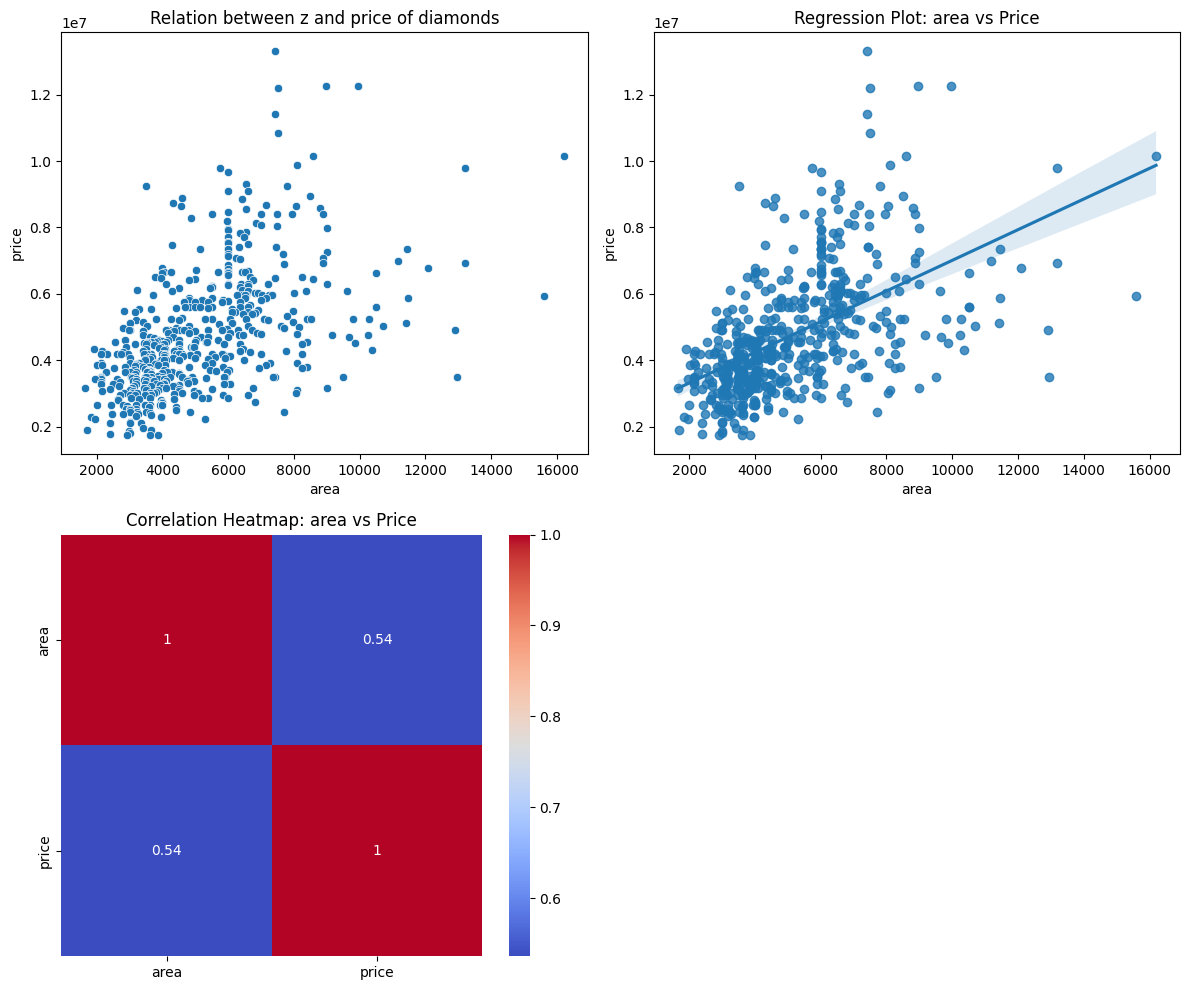

2. Bivariate analysis between 'price' and 'bedrooms' columns.


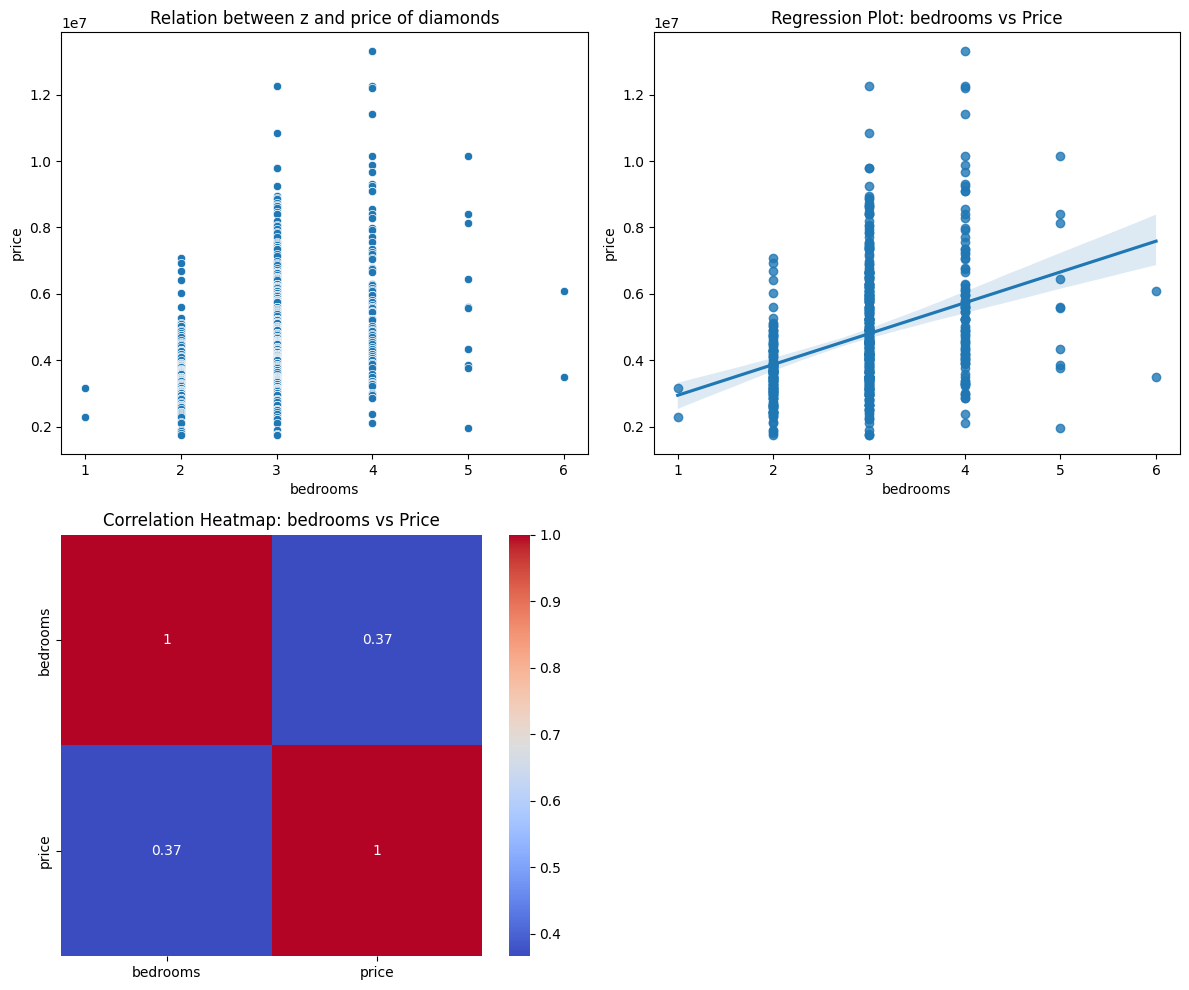

3. Bivariate analysis between 'price' and 'bathrooms' columns.


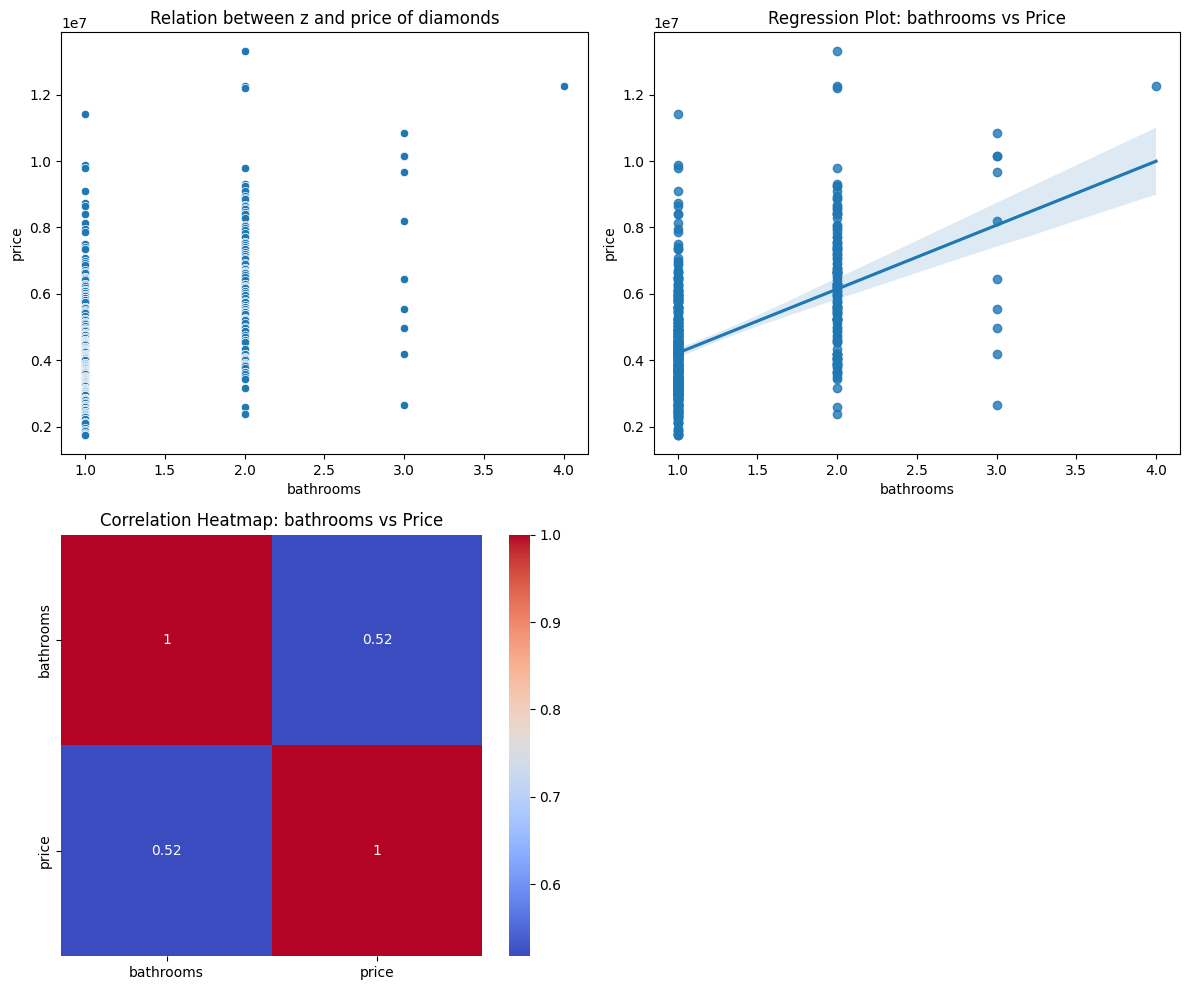

4. Bivariate analysis between 'price' and 'stories' columns.


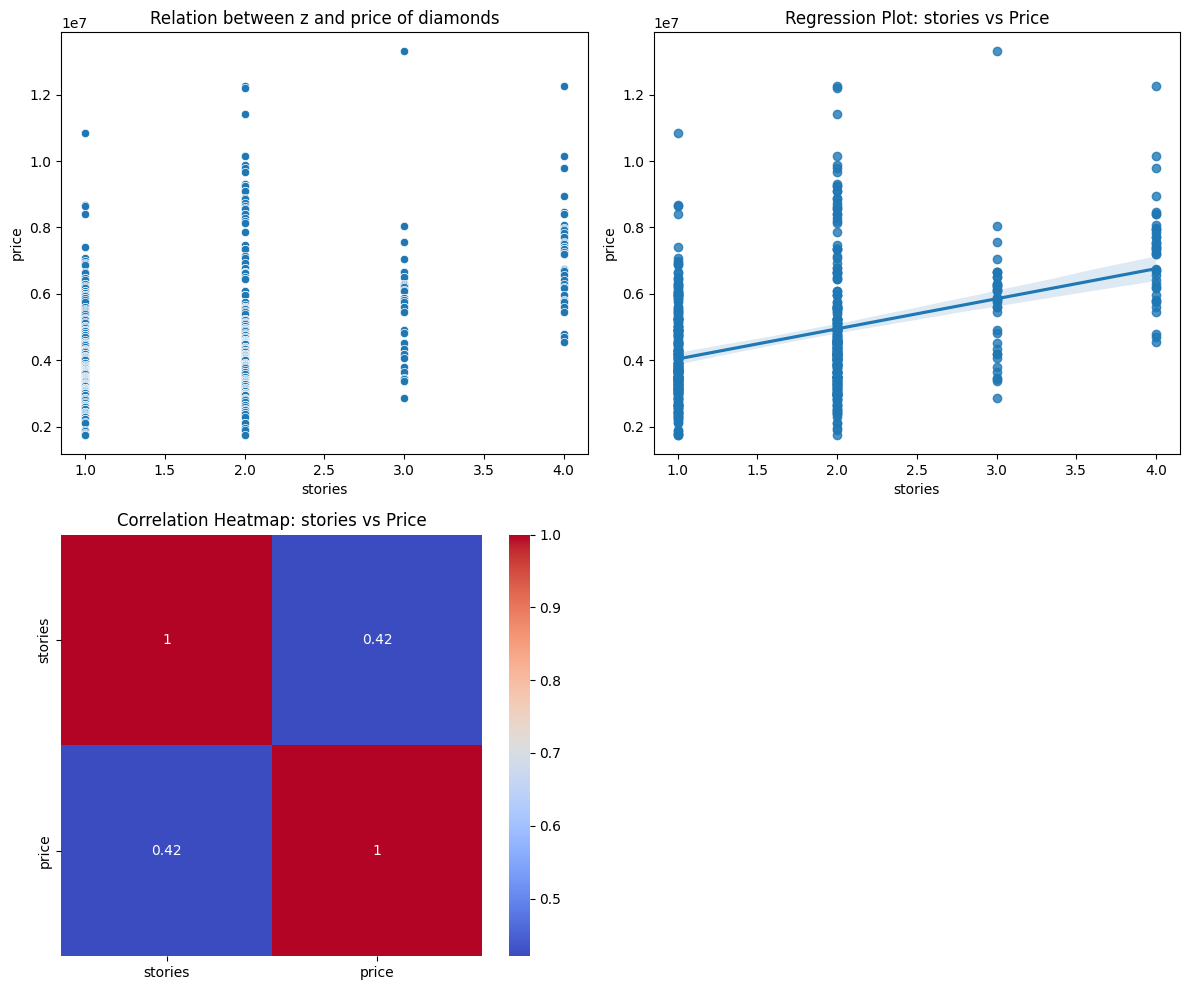

5. Bivariate analysis between 'price' and 'parking' columns.


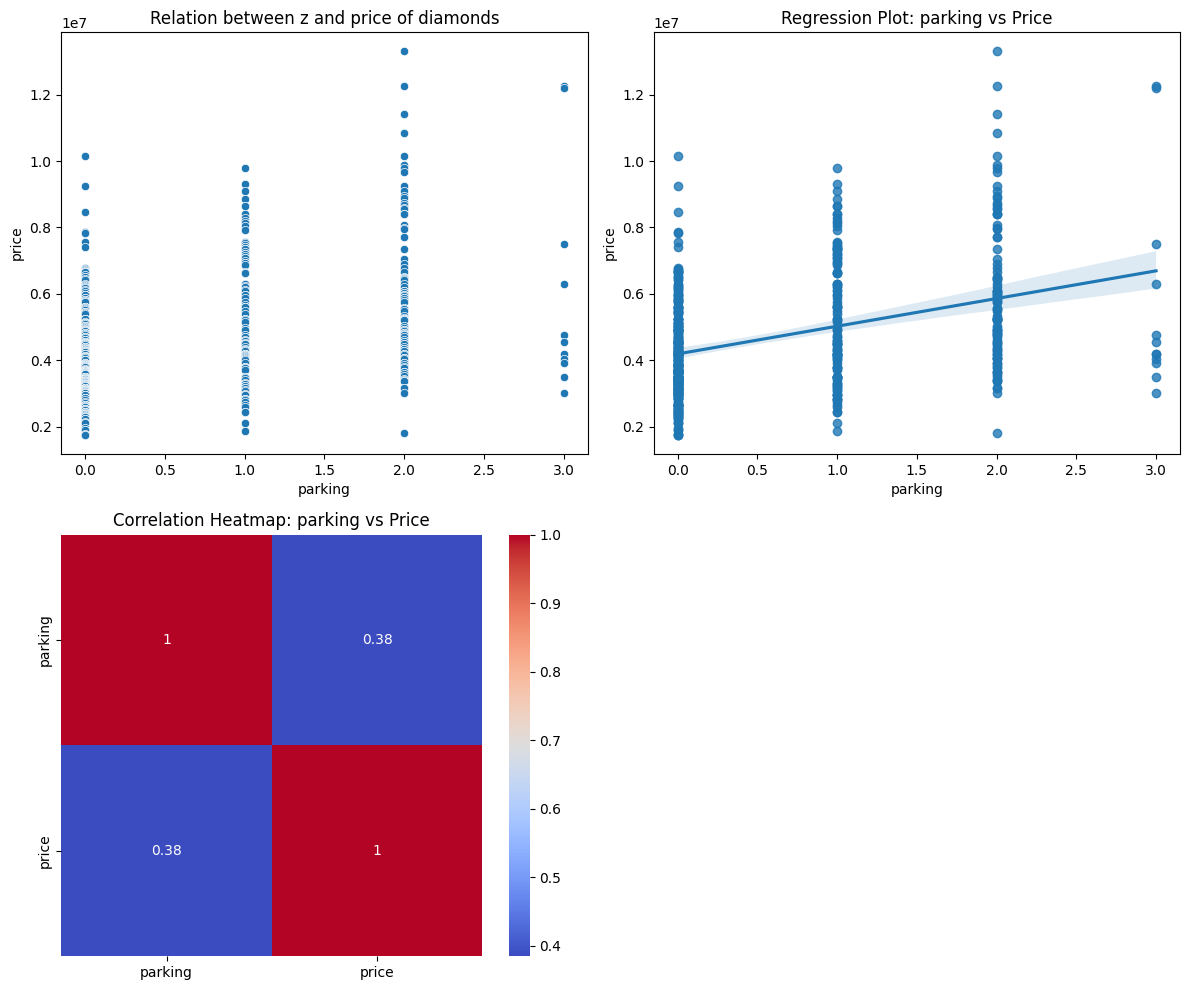

In [21]:
a = 1
for col in num_cols[1:]:
    print(f"{a}. Bivariate analysis between 'price' and '{col}' columns.")
    bivariate_num(col)
    print('=='*40)
    a+=1

### 2. Bivariate Analysis between each categorical column with 'price' column

In [22]:
# create a fuction for bivariate analysis between categorical column and 'price' column 
def bivariate_cat(col):
    fig, ax = plt.subplots(2, 2, figsize=(10, 8))

    # Bar Plot
    sns.barplot(x=col, y='price', data=data, ax=ax[0, 0])
    ax[0, 0].set_title(f'Average Price by {col}')

    # Box Plot
    sns.boxplot(x=col, y='price', data=data, ax=ax[0, 1])
    ax[0, 1].set_title(f'Price Distribution by {col}')


    # Point Plot
    sns.pointplot(x=col, y='price', data=data, ax=ax[1, 0])
    ax[1, 0].set_title(f'Average Price by {col}')
    
    ax[1,1].axis('off')

    plt.tight_layout()
    plt.show()

1. Bivariate analysis between 'price' and 'mainroad' columns.


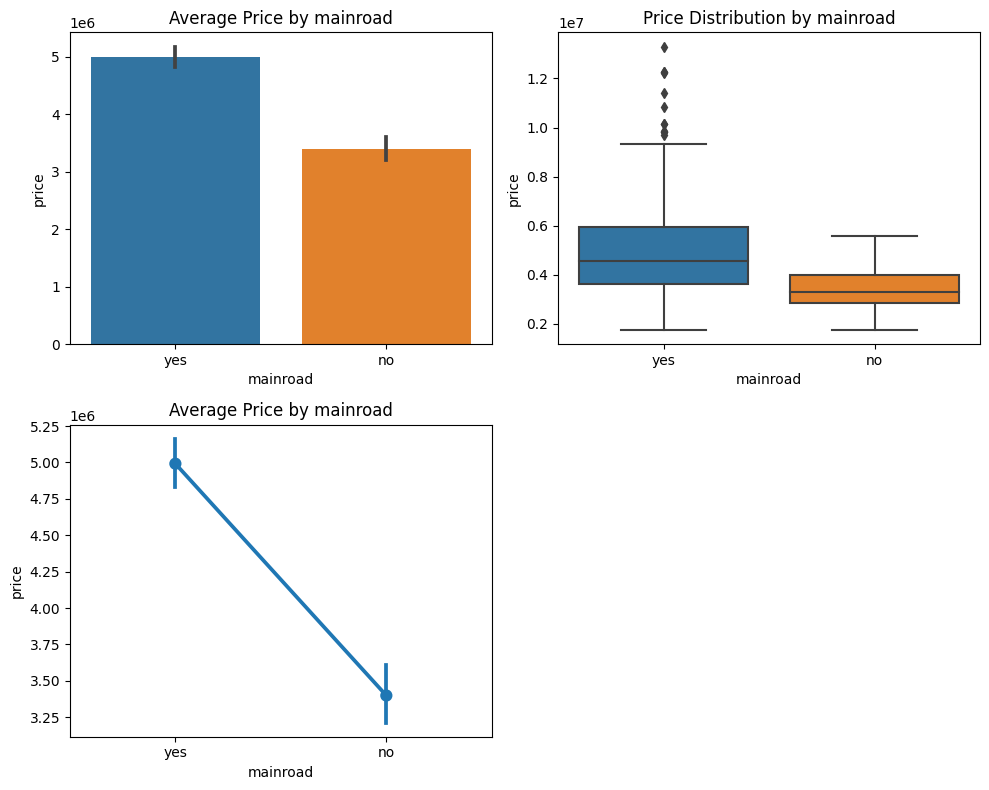

2. Bivariate analysis between 'price' and 'guestroom' columns.


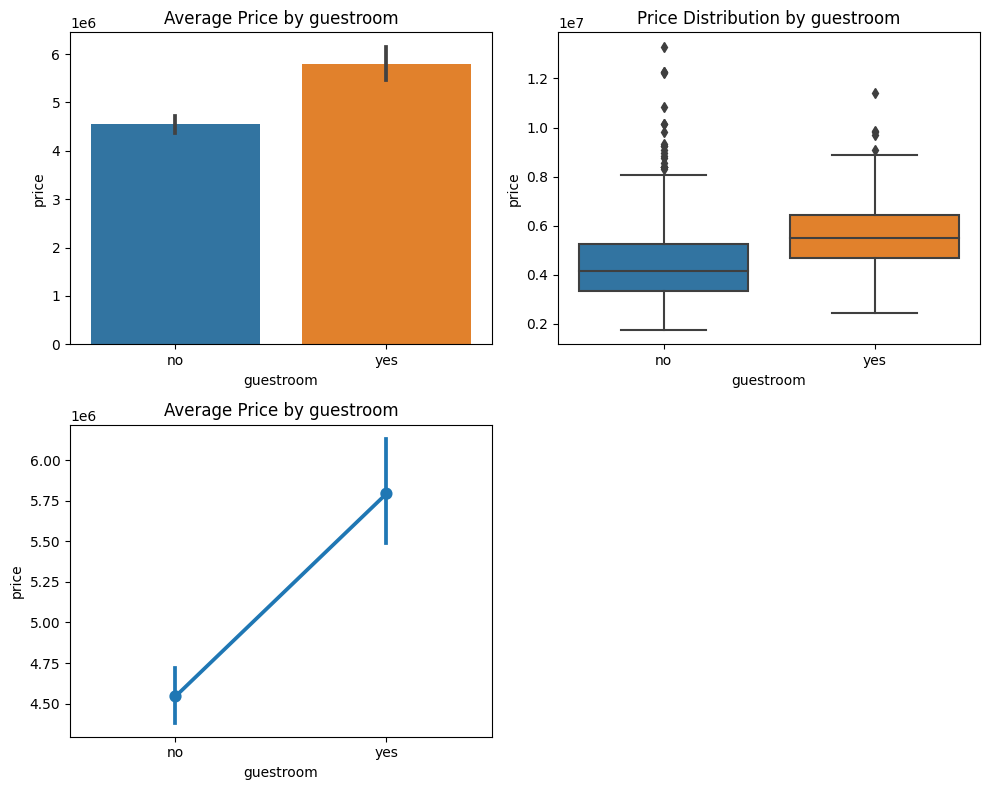

3. Bivariate analysis between 'price' and 'basement' columns.


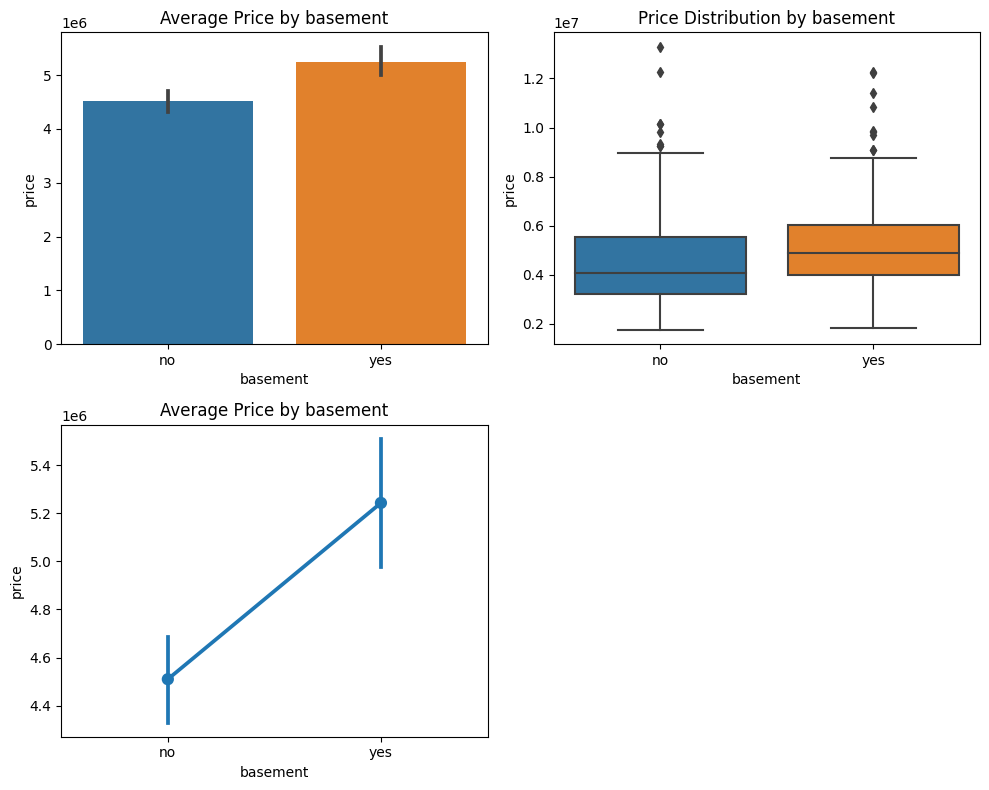

4. Bivariate analysis between 'price' and 'hotwaterheating' columns.


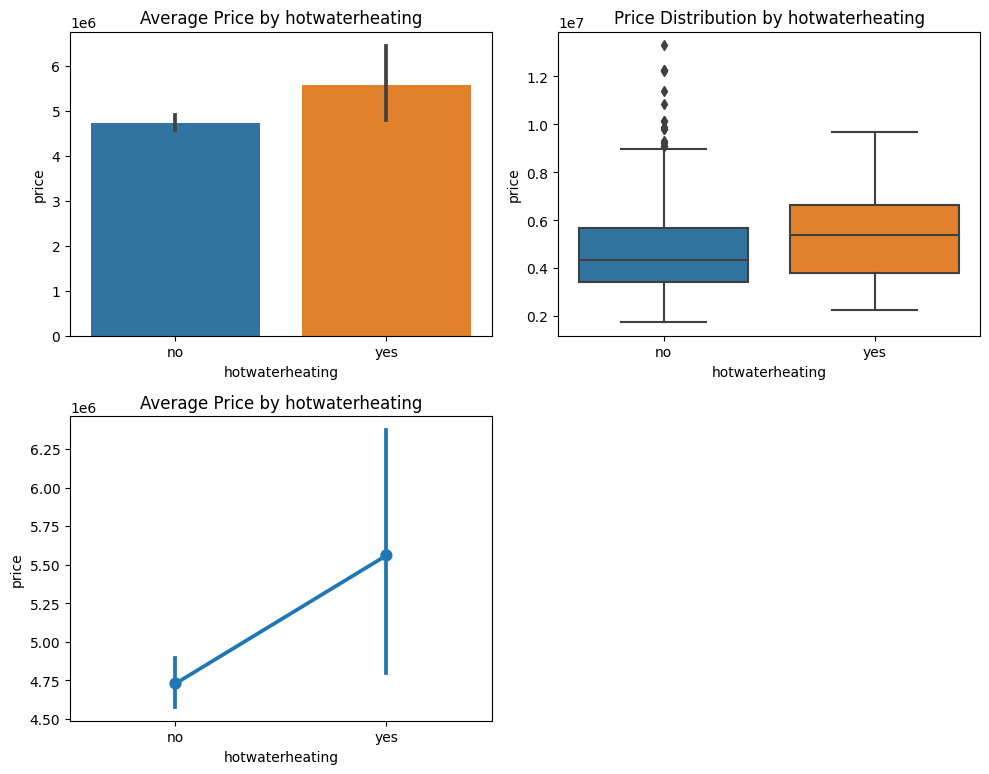

5. Bivariate analysis between 'price' and 'airconditioning' columns.


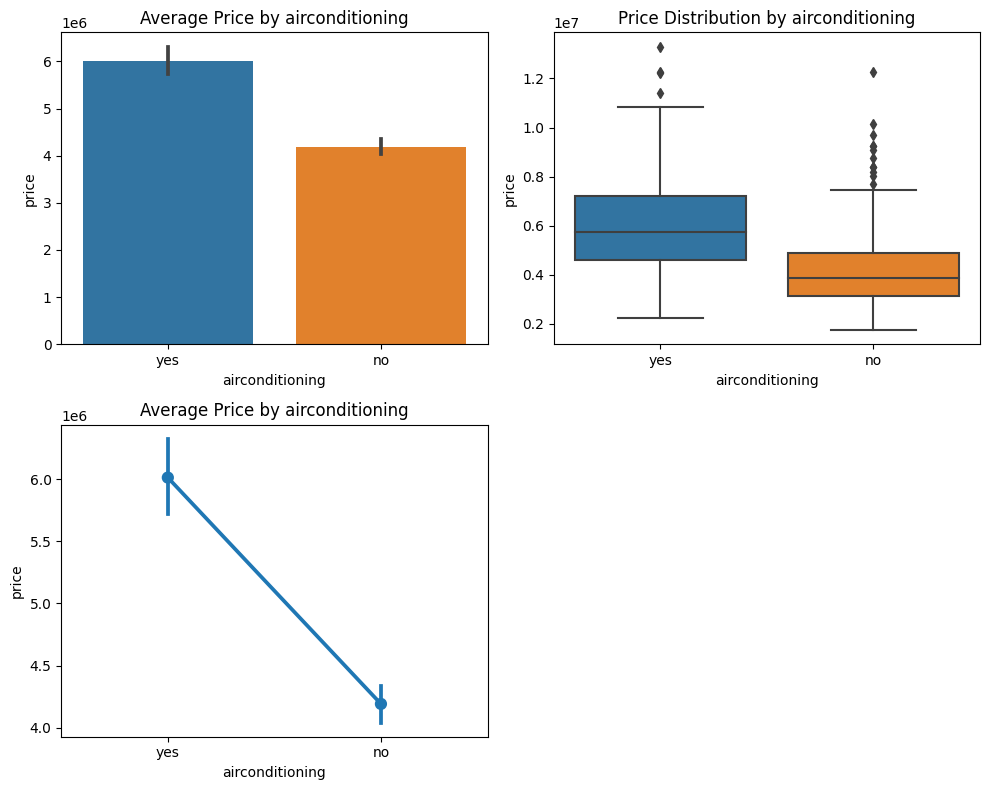

6. Bivariate analysis between 'price' and 'prefarea' columns.


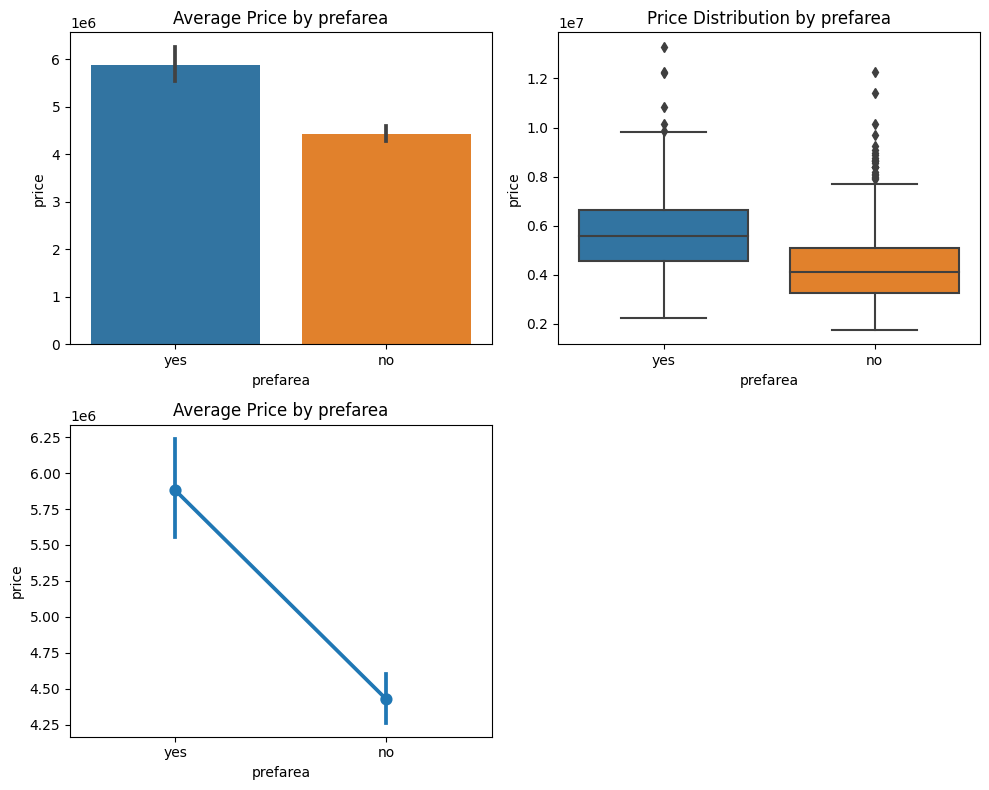

7. Bivariate analysis between 'price' and 'furnishingstatus' columns.


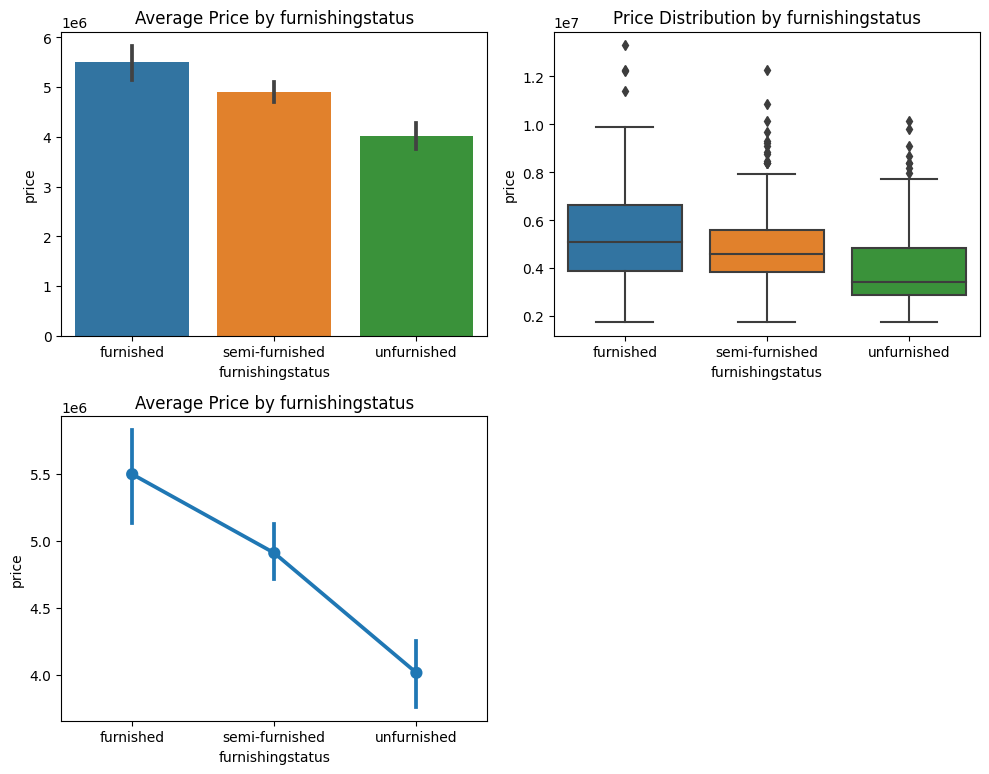

In [23]:
a = 1
for col in cat_cols:
    print(f"{a}. Bivariate analysis between 'price' and '{col}' columns.")
    bivariate_cat(col)
    print('=='*40)
    a+=1

## Conclusion 4:based on Bivariate analysis between 'price' and categorica columns
1. Average price of house beside of main road is greater that price of house which not has main road beside.
2. The avegrage price of house which has guestrooms is greater than non guestroom houses.
3. similarly , houses with basements, hot water heating system, air conditioning, and parking area has greater average price.
4. Average price of house in preferred area is greater than  house in non preffered area.
5. Average price of furnished house is greater than other semi-furnished and unfurnished housed.


In [24]:
### create fuction for Outlier remiving
def remove_outlier(data, column):
    #  quartiles and IQR for the specified column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers outside the bounds for the specified column
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return data


In [25]:
# create a new data frame before removing outliers
data1 = data.copy()

In [26]:
# removing outliers from 'area' column
data1 = remove_outlier(data1, 'area')

<Axes: xlabel='area'>

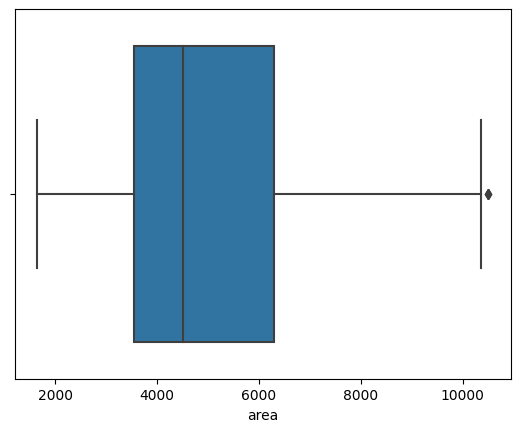

In [27]:
sns.boxplot(x=data1['area'])

In [28]:
data1['area'].skew()

0.6834966022795852

In [29]:
# removing outliers from 'area' column
data1 = remove_outlier(data1, 'price')

<Axes: xlabel='price'>

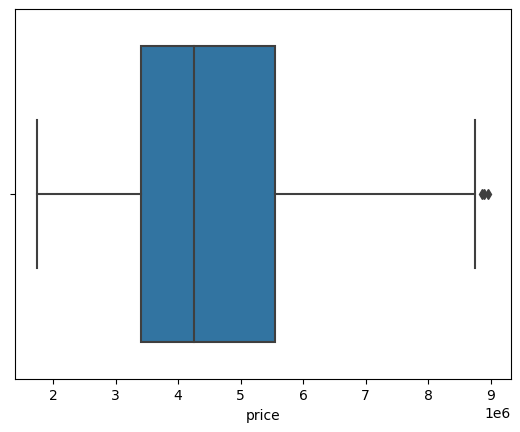

In [30]:
sns.boxplot(x=data1['price'])

## EDA-4. Multivariate Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


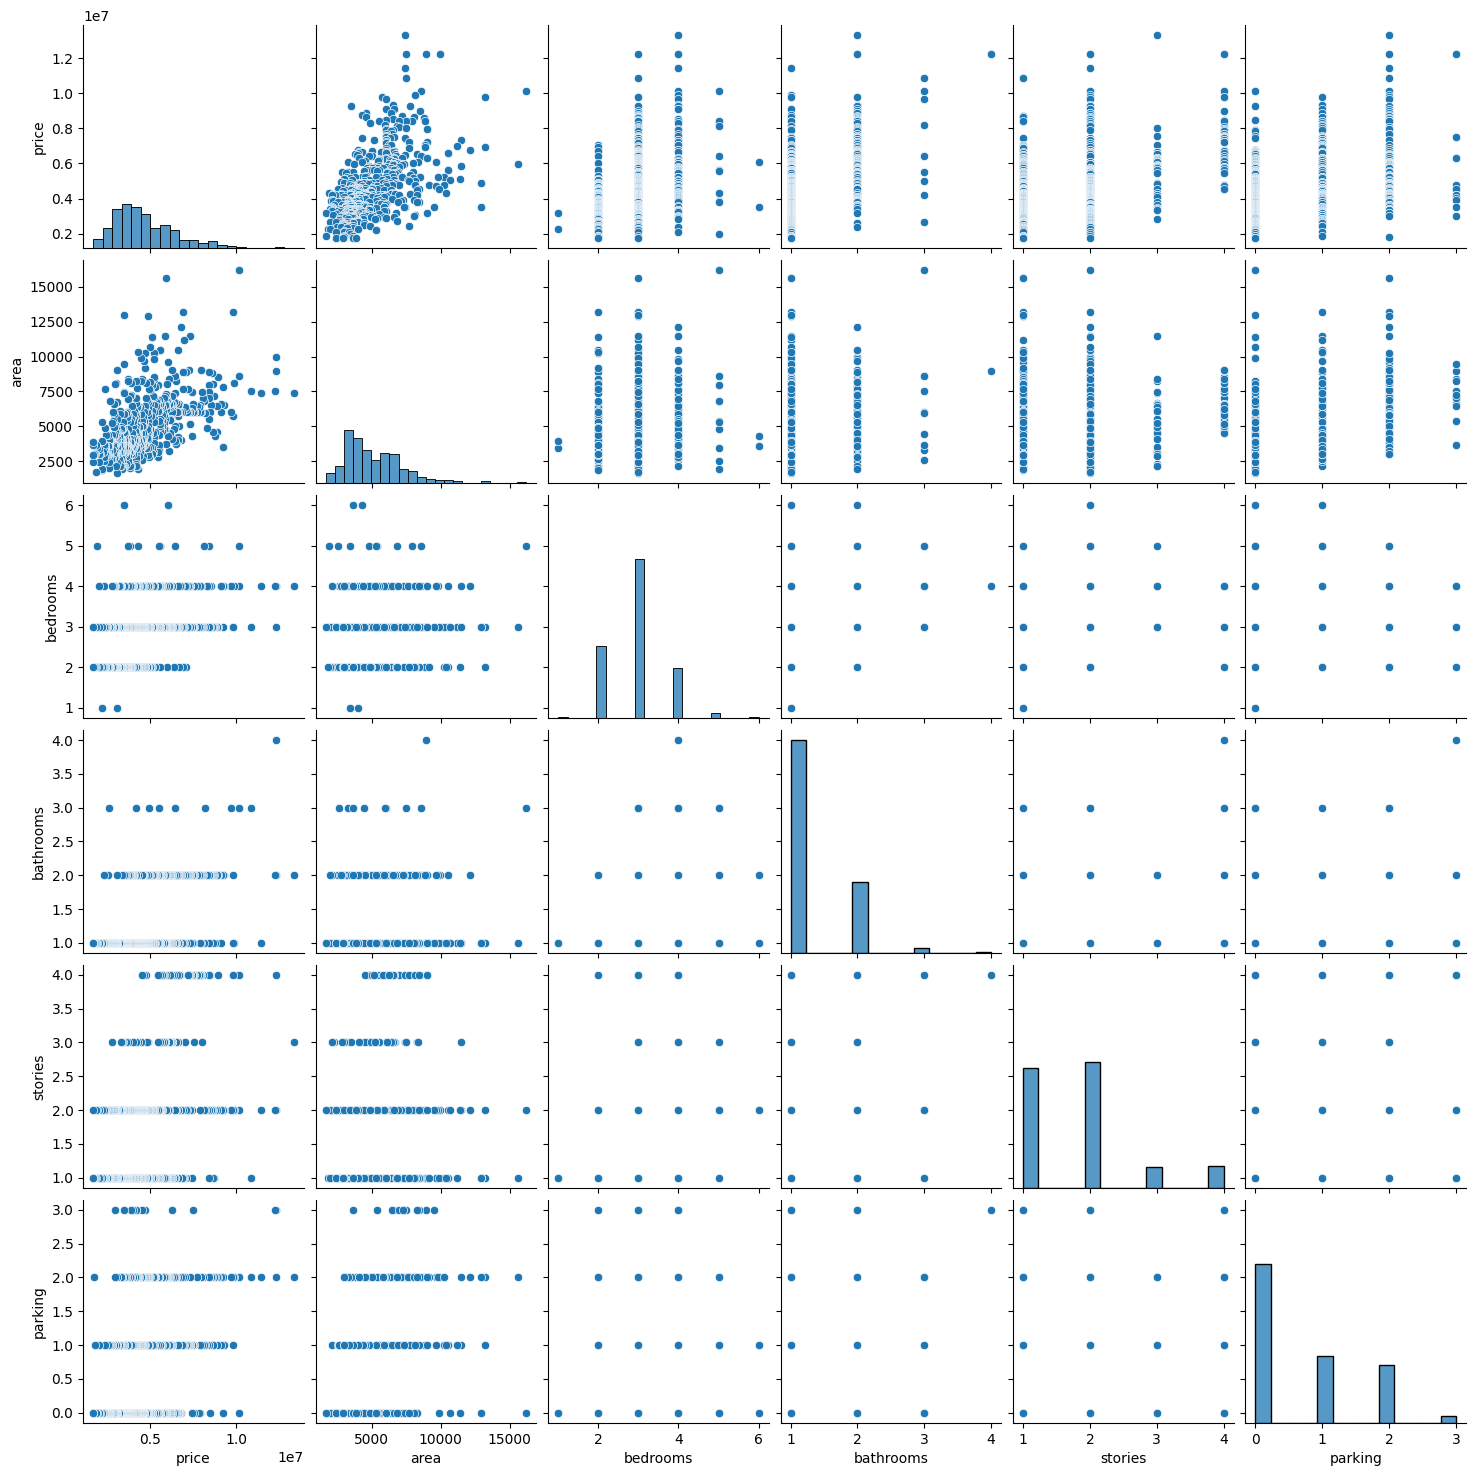

In [31]:
# pairplot
sns.pairplot(data)

In [32]:
# correlation
data.corr(numeric_only=True)

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


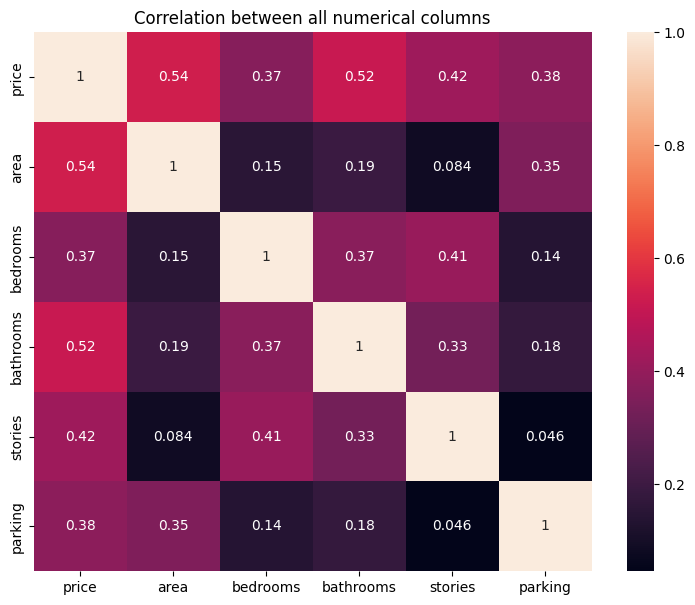

In [33]:
# heatmap
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title('Correlation between all numerical columns')
plt.show()

In [34]:
### Store a new cleaned doata to a csv file
data1.to_csv('House_price_prediction_cleaned_data.csv')

# split data as dependent and independent columns

In [35]:
X = data1.drop('price', axis=1)
y = data1['price']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

print('Shape of X_train: ',X_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X_train:  (388, 12)
Shape of X_test:  (130, 12)
Shape of y_train:  (388,)
Shape of y_test:  (130,)


# 5. Feature Encoding

## Encoding Categorical columns


In [37]:
cat_cols

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [38]:
ohe = OneHotEncoder(drop='first')

# fit X_train in onehotencoder
ohe.fit(X_train[cat_cols])

# x_train transformed by ohe and stored in array
ohe_train = ohe.transform(X_train[cat_cols]).toarray()

# x_test transform by ohe and stored in an array
ohe_test = ohe.transform(X_test[cat_cols]).toarray()

# encoded column names 
encoded_column = ohe.get_feature_names_out(cat_cols)

# x_train dataframme
X_train_ohe = pd.DataFrame(ohe_train, columns=encoded_column)

# X_test dataframe for only categorical data
X_test_ohe = pd.DataFrame(ohe_test, columns=encoded_column)

In [39]:
X_train_ohe

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
383,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
384,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
385,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
386,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# 6. Feature Scaling

### 1. Standard Scaling

In [40]:
std_scaler = StandardScaler()
X_train_num = std_scaler.fit_transform(X_train[num_cols[1:]])
X_test_num = std_scaler.transform(X_test[num_cols[1:]])

# create standard scaled df
X_train_std = pd.DataFrame(X_train_num, columns=num_cols[1:])
X_test_std = pd.DataFrame(X_test_num, columns=num_cols[1:])

In [41]:
# before apllying Standard Scaler
round(X_train[num_cols[1:]].describe(),2)

,area,bedrooms,bathrooms,stories,parking
count,388.00,388.00,388.00,388.00,388.00
mean,4895.47,2.94,1.28,1.83,0.65
std,1826.47,0.75,0.48,0.86,0.84
min,1650.00,1.00,1.00,1.00,0.00
25%,3518.00,2.00,1.00,1.00,0.00
50%,4455.00,3.00,1.00,2.00,0.00
75%,6010.00,3.00,2.00,2.00,1.00
max,10500.00,6.00,3.00,4.00,3.00


In [42]:
# after applied standard sclaer---> mean=0 and std = 1
round(X_train_std.describe(),2)

,area,bedrooms,bathrooms,stories,parking
count,388.00,388.00,388.00,388.00,388.00
mean,-0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.78,-2.59,-0.58,-0.96,-0.78
25%,-0.76,-1.26,-0.58,-0.96,-0.78
50%,-0.24,0.08,-0.58,0.20,-0.78
75%,0.61,0.08,1.53,0.20,0.41
max,3.07,4.10,3.63,2.52,2.80


### 2. MinMax Scaler

In [43]:
minmax = MinMaxScaler()
X_train_num1 = minmax.fit_transform(X_train[num_cols[1:]])
X_test_num1 = minmax.transform(X_test[num_cols[1:]])

# create standard scaled df
X_train_minmax = pd.DataFrame(X_train_num1, columns=num_cols[1:])
X_test_minmax = pd.DataFrame(X_test_num1, columns=num_cols[1:])

In [44]:
# after applied standard sclaer---> min=0 and max = 1
round(X_train_minmax.describe(),2)

,area,bedrooms,bathrooms,stories,parking
count,388.00,388.00,388.00,388.00,388.00
mean,0.37,0.39,0.14,0.28,0.22
std,0.21,0.15,0.24,0.29,0.28
min,0.00,0.00,0.00,0.00,0.00
25%,0.21,0.20,0.00,0.00,0.00
50%,0.32,0.40,0.00,0.33,0.00
75%,0.49,0.40,0.50,0.33,0.33
max,1.00,1.00,1.00,1.00,1.00


# 7. Concat both encoded and scaled data


### 1. Encoded and Standard Scaled Data

In [45]:
# enocded and standard scaled data
X_train_ohe_std = pd.concat([X_train_ohe, X_train_std], axis=1)
X_test_ohe_std = pd.concat([X_test_ohe, X_test_std], axis=1)

X_train_ohe_std.head()

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,area,bedrooms,bathrooms,stories,parking
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.905877,0.082804,-0.580742,1.356318,1.607654
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.835767,0.082804,1.525126,1.356318,-0.782268
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.754047,-1.255860,-0.580742,0.197174,-0.782268
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.039117,1.421467,-0.580742,0.197174,-0.782268
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.729353,-1.255860,-0.580742,-0.961970,-0.782268


In [46]:
X_train_ohe_std.isnull().sum()

mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
hotwaterheating_yes                0
airconditioning_yes                0
prefarea_yes                       0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
dtype: int64

### 2. Encoded and minmax scaled data


In [47]:
# enocded and Minmax scaled data
X_train_ohe_minmax = pd.concat([X_train_ohe, X_train_minmax], axis=1)
X_test_ohe_minmax = pd.concat([X_test_ohe, X_test_minmax], axis=1)

X_train_ohe_minmax.head()

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,area,bedrooms,bathrooms,stories,parking
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.759548,0.4,0.0,0.666667,0.666667
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.538983,0.4,0.5,0.666667,0.000000
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.211299,0.2,0.0,0.333333,0.000000
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.152542,0.6,0.0,0.333333,0.000000
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.723164,0.2,0.0,0.000000,0.000000


# 8. Feature Selection

<Axes: >

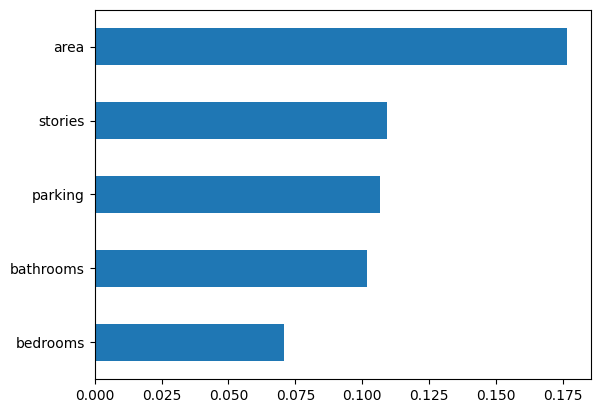

In [48]:
from sklearn.feature_selection import mutual_info_regression
a = data1[num_cols].drop('price', axis=1)
b = data1[num_cols]['price']
ar = mutual_info_regression(a,b)
s1 = pd.Series(ar, index= a.columns)
s1.sort_values(ascending=True).plot(kind='barh')

In [49]:
from sklearn.ensemble import RandomForestClassifier  # for classification tasks
from sklearn.ensemble import RandomForestRegressor  # for regression tasks
from sklearn.feature_selection import SelectFromModel

# Assuming X_train is your training feature matrix and y_train is your training target variable
model = RandomForestClassifier(n_estimators=100, random_state=42)  # for classification
# model = RandomForestRegressor(n_estimators=100, random_state=42)  # for regression
model.fit(X_train_ohe_std, y_train)

# Select top k features based on importance scores
sfm = SelectFromModel(model, threshold=-np.inf, max_features=8)  # Choose the number of features you want to keep (e.g., 5)
sfm.fit(X_train_ohe_std, y_train)

X_train_selected = sfm.transform(X_train_ohe_std)
X_test_selected = sfm.transform(X_test_ohe_std)

X_train_selected_df = pd.DataFrame(X_train_selected, columns=sfm.get_feature_names_out(X_train_ohe_std.columns))
X_test_selected_df = pd.DataFrame(X_test_selected, columns=sfm.get_feature_names_out(X_test_ohe_std.columns))

In [50]:
X_train_selected_df

,basement_yes,prefarea_yes,furnishingstatus_semi-furnished,area,bedrooms,bathrooms,stories,parking
0,0.0,0.0,0.0,1.905877,0.082804,-0.580742,1.356318,1.607654
1,0.0,1.0,0.0,0.835767,0.082804,1.525126,1.356318,-0.782268
2,0.0,1.0,0.0,-0.754047,-1.255860,-0.580742,0.197174,-0.782268
3,0.0,0.0,0.0,-1.039117,1.421467,-0.580742,0.197174,-0.782268
4,0.0,0.0,0.0,1.729353,-1.255860,-0.580742,-0.961970,-0.782268
...,...,...,...,...,...,...,...,...
383,1.0,0.0,0.0,-0.786940,0.082804,1.525126,-0.961970,0.412693
384,0.0,0.0,0.0,0.331412,0.082804,-0.580742,0.197174,-0.782268
385,0.0,0.0,0.0,-0.030407,-1.255860,-0.580742,0.197174,-0.782268
386,1.0,0.0,0.0,-0.216799,1.421467,1.525126,0.197174,1.607654


In [51]:
X_test_selected_df

,basement_yes,prefarea_yes,furnishingstatus_semi-furnished,area,bedrooms,bathrooms,stories,parking
0,0.0,0.0,1.0,0.942669,0.082804,-0.580742,0.197174,-0.782268
1,0.0,1.0,0.0,1.394944,0.082804,1.525126,2.515462,0.412693
2,1.0,0.0,1.0,-0.205835,0.082804,-0.580742,0.197174,-0.782268
3,1.0,0.0,0.0,-0.937698,-1.255860,-0.580742,-0.961970,1.607654
4,0.0,0.0,1.0,0.035378,1.421467,-0.580742,1.356318,-0.782268
...,...,...,...,...,...,...,...,...
125,0.0,1.0,1.0,-0.578619,0.082804,-0.580742,0.197174,0.412693
126,1.0,0.0,1.0,0.002485,-1.255860,-0.580742,0.197174,-0.782268
127,0.0,0.0,0.0,-0.775976,0.082804,-0.580742,-0.961970,-0.782268
128,0.0,0.0,1.0,0.605518,1.421467,1.525126,2.515462,1.607654


In [52]:
# Linear Regression with sstandard scaled data
from sklearn.ensemble import RandomForestRegressor
# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

model = RandomForestRegressor()
model.fit(X_train_selected_df, y_train)
y_pred = model.predict(X_test_selected_df)

# mean square error
mse = mean_squared_error(y_test,y_pred)
print("mean squared error of our ml model is :" , mse, "\n")

# root mean square error
rmse = np.sqrt(mse)
print("Root mean square : ",rmse, '\n')

# mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("mean absolute error of our ml model is : ",mae,'\n' )

# r2  score
r2_value = r2_score(y_test, y_pred)
print("r2_score is : ", r2_value)

mean squared error of our ml model is : 1096622893275.9531 

Root mean square :  1047197.6381161071 

mean absolute error of our ml model is :  817723.7079487181 

r2_score is :  0.5062983316076239


# 9. Trainin machine Learning Models

In [53]:
# Linear Regression with sstandard scaled data
from sklearn.linear_model import LinearRegression
# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

model = LinearRegression()
model.fit(X_train_ohe_std, y_train)
y_pred = model.predict(X_test_ohe_std)

# mean square error
mse = mean_squared_error(y_test,y_pred)
print("mean squared error of our ml model is :" , mse, "\n")

# root mean square error
rmse = np.sqrt(mse)
print("Root mean square : ",rmse, '\n')

# mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("mean absolute error of our ml model is : ",mae,'\n' )

# r2  score
r2_value = r2_score(y_test, y_pred)
print("r2_score is : ", r2_value)

mean squared error of our ml model is : 787072736061.3014 

Root mean square :  887171.1988456914 

mean absolute error of our ml model is :  684157.0400041101 

r2_score is :  0.6456583887476485


### lets try other regression machine learning models

In [54]:
lr = LinearRegression()
svr = SVR()
knn_r = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

regressors = {'Linear Regression':lr,
        'Support Vector Regressor':svr,
        'K-Nearest Neighbors Regressor':knn_r,
        'Decision Tree Regressor':dtr,
        'Random Forest Regressor':rfr,
        }

def train_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2score = r2_score(y_test,y_pred)
    
    return mse,r2score

## 1. Performance of few ML model with Standard Scaled data

In [55]:
mse_scores = []
rmse_scores = []
r2_scores = []
for name, model in regressors.items():
    mse,r2score = train_model(model, X_train_ohe_std , y_train, X_test_ohe_std, y_test)
    mse_scores.append(mse)
    rmse_scores.append(np.sqrt(mse))
    r2_scores.append(r2score)
    
    
performance_with_standard_scaler = pd.DataFrame({'Models':regressors.keys(),
                               'Mean Squared Error':mse_scores,
                               'Root mse': rmse_scores,
                               'R2_Scores':r2_scores}).sort_values('R2_Scores', ascending=False)

performance_with_standard_scaler

,Models,Mean Squared Error,Root mse,R2_Scores
0,Linear Regression,7.870727e+11,8.871712e+05,0.645658
4,Random Forest Regressor,8.104942e+11,9.002745e+05,0.635114
2,K-Nearest Neighbors Regressor,9.796208e+11,9.897579e+05,0.558973
3,Decision Tree Regressor,1.683050e+12,1.297324e+06,0.242288
1,Support Vector Regressor,2.235280e+12,1.495085e+06,-0.006327


## 2. Performance of few ML model with MinMax Scaled data

In [56]:
mse_scores = []
rmse_scores = []
r2_scores = []
for name, model in regressors.items():
    mse,r2score = train_model(model, X_train_ohe_minmax , y_train, X_test_ohe_minmax, y_test)
    mse_scores.append(mse)
    rmse_scores.append(np.sqrt(mse))
    r2_scores.append(r2score)
    
    
performance_with_standard_scaler = pd.DataFrame({'Models':regressors.keys(),
                               'Mean Squared Error':mse_scores,
                               'Root mse': rmse_scores,
                               'R2_Scores':r2_scores}).sort_values('R2_Scores', ascending=False)

performance_with_standard_scaler

,Models,Mean Squared Error,Root mse,R2_Scores
0,Linear Regression,7.870727e+11,8.871712e+05,0.645658
4,Random Forest Regressor,8.221072e+11,9.067013e+05,0.629886
2,K-Nearest Neighbors Regressor,1.045456e+12,1.022476e+06,0.529334
3,Decision Tree Regressor,1.551673e+12,1.245662e+06,0.301434
1,Support Vector Regressor,2.235291e+12,1.495089e+06,-0.006332


# we have to retrain our model, because performance is not good now.